In [1]:
import pandas as pd
import numpy as np

import json

from scripts.utils import SimulateData
from stopsignalmetrics.ssrtmodel import SSRTmodel

from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import seaborn as sns

import dataframe_image as dfi

In [2]:
SSRTscales = [85, 25, 5, 0]

SSRT_method_map = {'standard': 'Weighted', 'fixed': 'Fixed', 'tracking': 'Tracking'}
gen_map = {'gen-graded_both': 'Confusion',
           'gen-graded_go': 'Slowed Go Processing',
           'gen-guesses': 'Guessing',
           'gen-standard': 'Independent Race'}

gen_map_simple = {'graded_both': 'Confusion',
           'graded_go': 'Slowed Go Processing',
           'guesses': 'Guessing',
           'standard': 'Independent Race'}

# looking at correlations across generating models x SSRT methods, SSRT scales

In [3]:
# full_ssrt_df = pd.DataFrame()

# for SSRTscale in SSRTscales:
#     ssrt_df = pd.read_csv('ssrt_metrics/expected_ssrts_SSRTscale-%d.csv' % SSRTscale, index_col = 0)
#     # reformatting - was multiindex
#     ssrt_df.columns = [ f'gen-{gen}_SSRT-{ssrt}' for gen, ssrt in zip(ssrt_df.loc['underlying distribution', :].values, ssrt_df.columns)]
#     ssrt_df = ssrt_df.drop(['underlying distribution', 'NARGUID'])

#     for col in ssrt_df.columns:
#         ssrt_df[col] = ssrt_df[col].astype(float)

In [4]:
def read_in_multiidx_df(ssrtscale):
    tst_df = pd.read_csv('ssrt_metrics/expected_ssrts_SSRTscale-%d.csv' % ssrtscale, index_col = 0, header=[0,1])
    tst_df = tst_df.drop('guesses', level=0, axis=1)
    tst_df = tst_df.drop('graded_go', level=0, axis=1)
    tst_df = tst_df.drop('graded_both', level=0, axis=1)
    tst_df.columns = tst_df.columns.set_names('SSRT Method', level=0)
    tst_df.columns = tst_df.columns.set_names('Generating Model', level=1)
    tst_df = tst_df.rename(columns=SSRT_method_map, level=0)
    tst_df = tst_df.rename(columns=gen_map_simple, level=1)
    return tst_df

pd_df = {'SSRTscale=%d' % scale: read_in_multiidx_df(scale) for scale in  SSRTscales}

In [5]:
corr_df = pd_df['SSRTscale=85'].corr(method='spearman')
corr_df = corr_df.loc[corr_df.index.get_level_values(1)!='Independent Race', corr_df.columns.get_level_values(1)=='Independent Race']
corr_df.droplevel(1, axis=1)

SSRT Method                       Weighted     Fixed  Tracking
SSRT Method Generating Model                                  
Weighted    Confusion             0.847651  0.823044  0.793582
            Slowed Go Processing  0.932054  0.967091  0.940639
            Guessing              0.882841  0.883268  0.831584
Fixed       Confusion             0.945386  0.973496  0.927501
            Slowed Go Processing  0.948272  0.975553  0.930655
            Guessing              0.859395  0.906937  0.832101
Tracking    Confusion             0.987024  0.984714  0.994806
            Slowed Go Processing  0.961292  0.983543  0.948930
            Guessing              0.964556  0.985161  0.950957

In [6]:
corr_df = pd_df['SSRTscale=25'].corr(method='spearman')
corr_df = corr_df.loc[corr_df.index.get_level_values(1)!='Independent Race', corr_df.columns.get_level_values(1)=='Independent Race']
corr_df.droplevel(1, axis=1)

SSRT Method                       Weighted     Fixed  Tracking
SSRT Method Generating Model                                  
Weighted    Confusion             0.729580  0.615414  0.475834
            Slowed Go Processing  0.661254  0.849783  0.698311
            Guessing              0.712721  0.675053  0.448605
Fixed       Confusion             0.742904  0.890478  0.623447
            Slowed Go Processing  0.751064  0.895976  0.634714
            Guessing              0.587196  0.765179  0.429138
Tracking    Confusion             0.876190  0.838457  0.965085
            Slowed Go Processing  0.779033  0.911575  0.677161
            Guessing              0.836705  0.951849  0.754173

In [7]:
corr_df = pd_df['SSRTscale=5'].corr(method='spearman')
corr_df = corr_df.loc[corr_df.index.get_level_values(1)!='Independent Race', corr_df.columns.get_level_values(1)=='Independent Race']
corr_df.droplevel(1, axis=1)

SSRT Method                       Weighted     Fixed  Tracking
SSRT Method Generating Model                                  
Weighted    Confusion             0.820041  0.540094  0.176639
            Slowed Go Processing  0.177755  0.681644  0.247106
            Guessing              0.812881  0.674141  0.194281
Fixed       Confusion             0.564066  0.892707  0.255062
            Slowed Go Processing  0.563060  0.887390  0.255884
            Guessing              0.541527  0.879659  0.203974
Tracking    Confusion             0.251913  0.176027  0.553595
            Slowed Go Processing  0.567366  0.886458  0.269588
            Guessing              0.594349  0.902361  0.342064

In [8]:
corr_df = pd_df['SSRTscale=0'].corr(method='spearman')
corr_df = corr_df.loc[corr_df.index.get_level_values(1)!='Independent Race', corr_df.columns.get_level_values(1)=='Independent Race']
corr_df.droplevel(1, axis=1)

SSRT Method                       Weighted     Fixed  Tracking
SSRT Method Generating Model                                  
Weighted    Confusion             0.846541  0.519747  0.129184
            Slowed Go Processing  0.092678  0.677320  0.146728
            Guessing              0.847930  0.662002  0.156904
Fixed       Confusion             0.535177  0.903071  0.183349
            Slowed Go Processing  0.529635  0.895206  0.181814
            Guessing              0.537224  0.913442  0.185171
Tracking    Confusion            -0.095310 -0.201330  0.021480
            Slowed Go Processing  0.529901  0.896101  0.182643
            Guessing              0.513343  0.879253  0.175802

In [9]:
corr_dict = {}
simple_dict = {}
SSRT_types = ['Weighted', 'Fixed', 'Tracking']
for scale_key in pd_df.keys():
    corr_array = []
    simplified_corr_df = pd.DataFrame(index=['Confusion', 'Slowed Go Processing', 'Guessing', 'Independent Race'], columns=SSRT_types)
    for ssrt_type in SSRT_types:
        curr_corr_df = pd_df[scale_key].filter(regex=ssrt_type).corr(method='spearman').copy()
        np.fill_diagonal(curr_corr_df.values, np.nan)
        corr_vals = curr_corr_df[(ssrt_type, 'Independent Race')].values
        assert np.isnan(corr_vals[-1])  # checking that the order is correct, aka independent condition is last
        simplified_corr_df[ssrt_type] = curr_corr_df[(ssrt_type, 'Independent Race')].droplevel(0)
        corr_array.append(corr_vals)
        
    corr_array = [r for rlist in corr_array for r in rlist]
    print(scale_key)
    print('min: ', np.nanmin(corr_array))
    print('mean:', np.nanmean(corr_array))
    corr_dict[scale_key] = corr_array
    simple_dict[f'{scale_key} (range:{np.nanmin(corr_dict[scale_key]):.2f}-{np.nanmax(corr_dict[scale_key]):.2f}; mean:{np.nanmean(corr_dict[scale_key]):.2f})'] = simplified_corr_df
    
simple_table = pd.concat(simple_dict.values(), axis=1, keys=simple_dict.keys()).dropna()
simple_table = simple_table.rename(columns={'Weighted': 'ABCD Weighted'}, level=1)
dfi.export(simple_table, 'figures/correlations.png')
simple_table

SSRTscale=85
min:  0.8476507208487455
mean: 0.934802738158568
SSRTscale=25
min:  0.6612536988081903
mean: 0.783511655554326
SSRTscale=5
min:  0.17775515842073933
mean: 0.6261867288902175
SSRTscale=0
min:  0.021479529041817966
mean: 0.5420881346425266


SSRTscale=85 (range:0.85-0.99; mean:0.93)            \
                                                 ABCD Weighted     Fixed   
Confusion                                             0.847651  0.973496   
Slowed Go Processing                                  0.932054  0.975553   
Guessing                                              0.882841  0.906937   

                               SSRTscale=25 (range:0.66-0.97; mean:0.78)  \
                      Tracking                             ABCD Weighted   
Confusion             0.994806                                  0.729580   
Slowed Go Processing  0.948930                                  0.661254   
Guessing              0.950957                                  0.712721   

                                          \
                         Fixed  Tracking   
Confusion             0.890478  0.965085   
Slowed Go Processing  0.895976  0.677161   
Guessing              0.765179  0.754173   

                     SSRTscale=5 (range:0.18-0.89; mean:0.63)            \
                                                ABCD Weighted     Fixed   
Confusion                                            0.820041  0.892707   
Slowed Go Processing                                 0.177755  0.887390   
Guessing                                             0.812881  0.879659   

                               SSRTscale=0 (range:0.02-0.91; mean:0.54)  \
                      Tracking                            ABCD Weighted   
Confusion             0.553595                                 0.846541   
Slowed Go Processing  0.269588                                 0.092678   
Guessing              0.342064                                 0.847930   

                                          
                         Fixed  Tracking  
Confusion             0.903071  0.021480  
Slowed Go Processing  0.895206  0.182643  
Guessing              0.913442  0.175802

# Plot graded Mu function

In [10]:
SSDs = np.arange(0,600, 5)

simulator = SimulateData()
mu_gos = [[i, simulator._log_grade_mu(1, i)] for i in SSDs]

/Users/henrymj/Documents/ABCD_simulations/scripts/utils.py:342: RuntimeWarning: divide by zero encountered in log
  return self._at_least_0((np.log(SSD/max_SSD)/4+1) * mu_go)


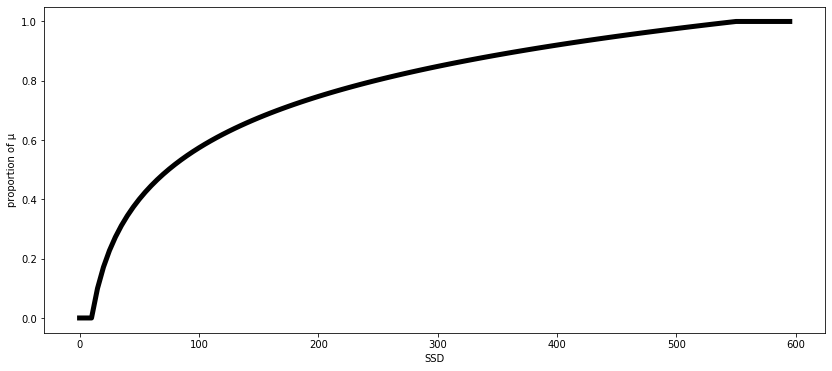

In [11]:
fig,ax = plt.subplots(1,1, figsize=(14, 6))

_ = sns.lineplot(x='SSD', y='proportion of \u03BC', color='k', linewidth=5, data=pd.DataFrame(mu_gos, columns=['SSD', 'proportion of \u03BC']))
plt.savefig('figures/graded_mu_go_function.png', dpi=400)